In [75]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, auc
from sklearn.model_selection import train_test_split, GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt


%matplotlib inline


In [50]:
df_sample = pd.read_csv('sample_submission.csv', sep='\t', encoding='utf8')
df_train = pd.read_csv('train.csv', sep='\t', encoding='utf8')
df_test = pd.read_csv('test.csv', sep='\t', encoding='utf8')

In [5]:
df_train.shape

(24712, 22)

In [6]:
df_test.shape

(16476, 21)

In [7]:
df_sample.shape

(16476, 2)

In [8]:
#проверим наши данные на наличие пропусков
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16476 entries, 0 to 16475
Data columns (total 21 columns):
_id               16476 non-null object
age               16476 non-null int64
job               16476 non-null object
marital           16476 non-null object
education         16476 non-null object
default           16476 non-null object
housing           16476 non-null object
loan              16476 non-null object
contact           16476 non-null object
month             16476 non-null object
day_of_week       16476 non-null object
duration          16476 non-null int64
campaign          16476 non-null int64
pdays             16476 non-null int64
previous          16476 non-null int64
poutcome          16476 non-null object
emp.var.rate      16476 non-null float64
cons.price.idx    16476 non-null float64
cons.conf.idx     16476 non-null float64
euribor3m         16476 non-null float64
nr.employed       16476 non-null float64
dtypes: float64(5), int64(5), object(11)
memory usa

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24712 entries, 0 to 24711
Data columns (total 22 columns):
_id               24712 non-null object
age               24712 non-null int64
job               24712 non-null object
marital           24712 non-null object
education         24712 non-null object
default           24712 non-null object
housing           24712 non-null object
loan              24712 non-null object
contact           24712 non-null object
month             24712 non-null object
day_of_week       24712 non-null object
duration          24712 non-null int64
campaign          24712 non-null int64
pdays             24712 non-null int64
previous          24712 non-null int64
poutcome          24712 non-null object
emp.var.rate      24712 non-null float64
cons.price.idx    24712 non-null float64
cons.conf.idx     24712 non-null float64
euribor3m         24712 non-null float64
nr.employed       24712 non-null float64
target            24712 non-null int64
dtypes: floa

In [10]:
df_train.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
count,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000,24712.000000
mean,40.030188,258.345298,2.580163,963.558797,0.171900,0.082713,93.576386,-40.516077,3.619397,5166.988111,0.112779
std,10.462301,261.573344,2.776757,184.224885,0.491511,1.572300,0.579548,4.639359,1.737099,72.516221,0.316329
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.000000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,98.000000,4918.000000,43.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [11]:
df_train.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target
0,df7489733b004bbe40d3d37b34f82419,54,technician,married,professional.course,unknown,no,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,905a0b9a5456ee962223033473666be3,36,services,single,basic.4y,no,no,no,telephone,may,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
2,02d69c07ec6d68e31d641edd45ce61cd,53,blue-collar,married,basic.4y,no,yes,no,cellular,aug,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,0
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,blue-collar,married,basic.9y,no,yes,yes,telephone,may,...,2,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0
4,ac2dc6f5835bdea8e71dd99b65208d07,29,services,single,university.degree,no,yes,no,telephone,aug,...,1,999,0,nonexistent,-1.7,94.027,-38.3,0.890,4991.6,0


In [12]:
df_test.head(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,66810d8e6bf2b41c880a7bc6c8a1e295,57,technician,married,high.school,no,no,yes,cellular,may,...,371,1,999,1,failure,-1.8,92.893,-46.2,1.299,5099.1
1,ccac3879652b08cb8b44c1920fd93afa,55,unknown,married,unknown,unknown,yes,no,telephone,may,...,285,2,999,0,nonexistent,1.1,93.994,-36.4,4.860,5191.0
2,fcccab4d7a76f70647f015f2c84c2af8,33,blue-collar,married,basic.9y,no,no,no,cellular,may,...,52,1,999,1,failure,-1.8,92.893,-46.2,1.313,5099.1
3,ed8399278c30678dab739045fa12b440,36,admin.,married,high.school,no,no,no,telephone,jun,...,355,4,999,0,nonexistent,1.4,94.465,-41.8,4.967,5228.1
4,1d4d62ac5cabcb48bac7112813f290cb,27,housemaid,married,high.school,no,yes,no,cellular,jul,...,189,2,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1


In [13]:
#временно добавим fake-таргет-значения в test выборку = 0

In [51]:
df_test['target']=0

In [52]:
#объединим test и train в один dataframe для предобработки
df_train['sample'] = 1 #train set = 1
df_test['sample'] = 0 #test set = 0
df = pd.concat([df_train, df_test], axis=0, ignore_index=True)

In [53]:
df.tail(5)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample
41183,114c0574c96ac1c71d6529b863a566d8,58,retired,married,university.degree,unknown,no,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,0
41184,467e0cc4856d357b4905a3a862e952b4,62,retired,married,professional.course,no,no,no,telephone,may,...,999,0,nonexistent,-1.8,93.876,-40.0,0.677,5008.7,0,0
41185,d1f7a1196e049d5bff3375606950c86c,25,unemployed,married,high.school,unknown,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1,0,0
41186,3e837730540e9b0d6a980b3f6a12bb48,44,technician,divorced,professional.course,unknown,yes,no,cellular,aug,...,999,0,nonexistent,1.4,93.444,-36.1,4.964,5228.1,0,0
41187,82db4c5dd22e8182b30917571fe77c4d,29,technician,married,university.degree,no,no,no,cellular,jul,...,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,0,0


In [17]:
df.month.unique()

array(['aug', 'may', 'jun', 'nov', 'oct', 'apr', 'jul', 'mar', 'sep', 'dec'], dtype=object)

In [54]:
def preprocess_data(df_input):
    df_output = df_input

    df_output.loc[:, 'month'] = df_output.month.replace({'jan': 1, 'feb': 2,'mar': 3,'apr': 4,'may': 5,'jun': 6, 
                                                         'jul': 7, 'aug': 8,'sep': 9,'oct': 10,'nov': 11,'dec': 12})
    for i in df_output.select_dtypes(exclude=[np.number]).columns:
        if i != '_id':
            #кодируем категории в числа 
            enc = LabelEncoder()
            df_output[i] = enc.fit_transform(df_output.loc[:, [i]].values)

    return df_output

In [55]:
df_preproc = df.pipe(preprocess_data)

C:\Users\nalgrgar\AppData\Local\Continuum\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
df_preproc.head(10)

,_id,age,job,marital,education,default,housing,loan,contact,month,...,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,target,sample
0,df7489733b004bbe40d3d37b34f82419,54,9,1,5,1,0,0,0,8,...,999,0,1,1.4,93.444,-36.1,4.963,5228.1,0,1
1,905a0b9a5456ee962223033473666be3,36,7,2,0,0,0,0,1,5,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
2,02d69c07ec6d68e31d641edd45ce61cd,53,1,1,0,0,2,0,0,8,...,999,0,1,1.4,93.444,-36.1,4.965,5228.1,0,1
3,e492fbe0cccaf67cdb5c0944dbc8a167,34,1,1,2,0,2,2,1,5,...,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0,1
4,ac2dc6f5835bdea8e71dd99b65208d07,29,7,2,6,0,2,0,1,8,...,999,0,1,-1.7,94.027,-38.3,0.890,4991.6,0,1
5,3c41d96da147ab5a745938cbd85e2313,56,6,2,2,1,0,0,1,6,...,999,0,1,1.4,94.465,-41.8,4.961,5228.1,0,1
6,1a87845e9d5740a2619acd478da08459,33,0,1,6,0,2,2,0,5,...,999,0,1,-1.8,93.876,-40.0,0.685,5008.7,0,1
7,e07d393a5d9b174b39f6064823386759,36,4,1,6,0,2,0,0,11,...,999,1,0,-0.1,93.200,-42.0,4.120,5195.8,0,1
8,e5a3da407a75e8475a3e1bb6a804b1c7,70,5,1,5,0,0,0,0,10,...,6,3,2,-1.1,94.601,-49.5,0.987,4963.6,1,1
9,42b112272cd4851b4d65d1ed464fbbd9,32,1,1,5,1,2,0,0,5,...,999,1,0,-1.8,92.893,-46.2,1.327,5099.1,0,1


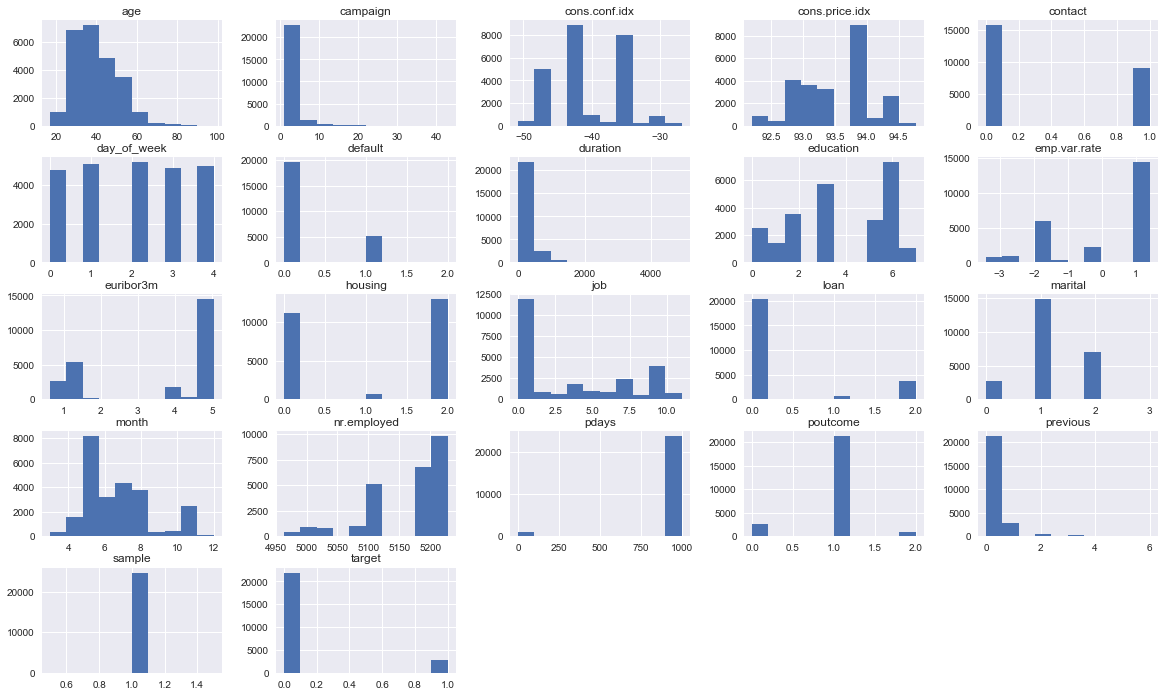

In [57]:
df_preproc[df['sample']==1].hist(figsize=(20, 12)); #посмотрим на наши данные (train)

In [48]:
df_preproc[df['sample']==1][['target', "_id"]].pivot_table(index = 'target', values = "_id", aggfunc='count') #посмотрим на наши данные (train)

,_id
target,
0,21925
1,2787


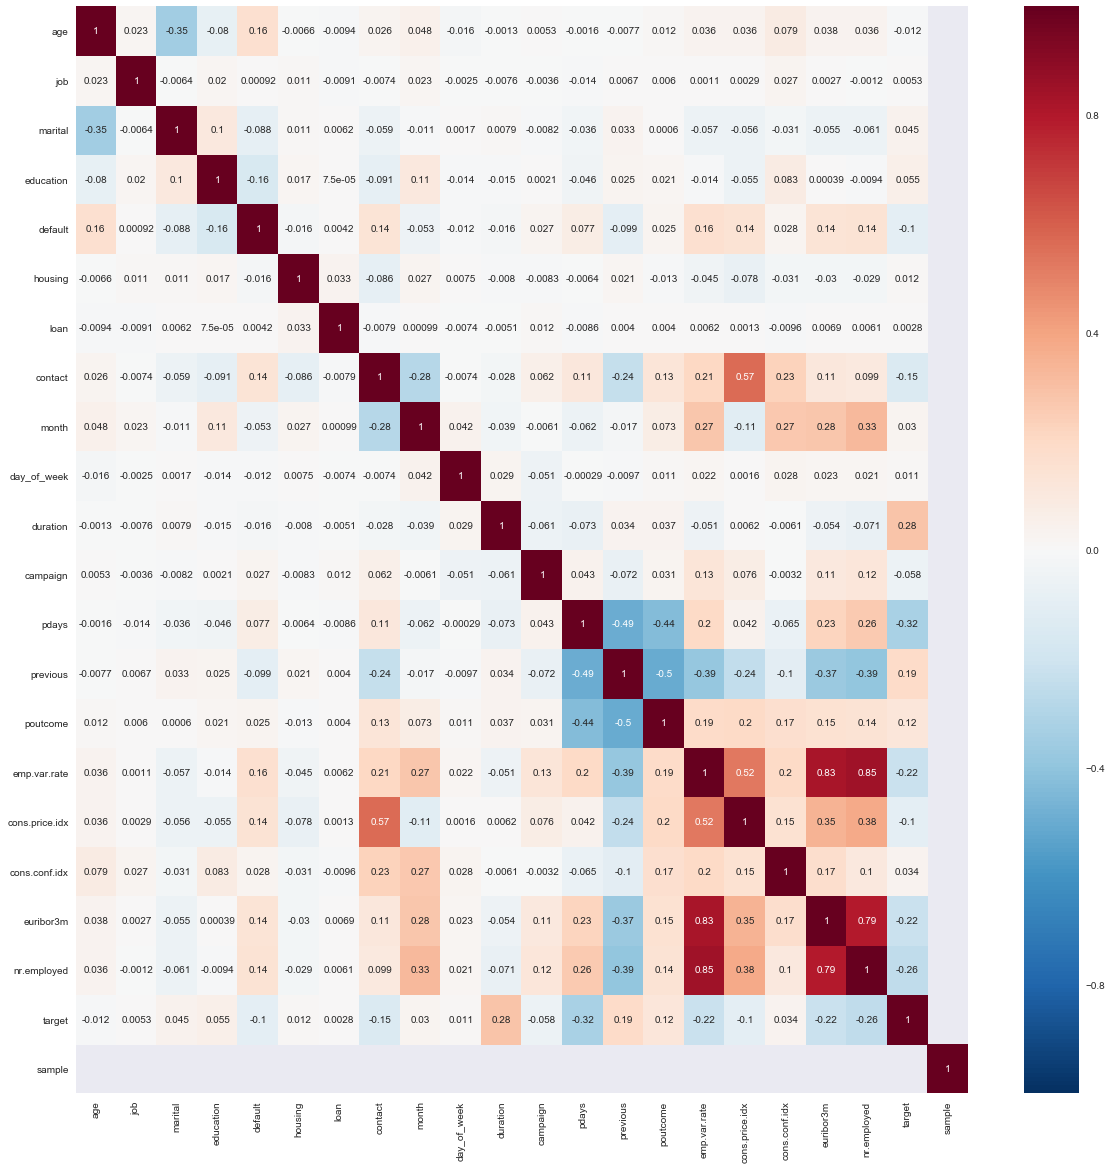

In [20]:
# посмотрим немного на наши данные
plt.figure(figsize=(20, 20))
sns.heatmap(df_preproc[df['sample']==1].corr('kendall'), annot=True);

In [58]:
X, y = df_preproc[df['sample']==1].drop(['_id'], axis = 1).iloc[:,:-2].values, df_preproc[df['sample']==1].drop(['_id'], axis = 1).iloc[:,-2].values #train выборка
ID, X_pred = df_preproc[df['sample']==0].iloc[:,0].values, df_preproc[df['sample']==0].drop(['_id'], axis = 1).iloc[:,:-2].values #test (предсказательная) выборка

In [59]:
X

array([[  5.40000000e+01,   9.00000000e+00,   1.00000000e+00, ...,
         -3.61000000e+01,   4.96300000e+00,   5.22810000e+03],
       [  3.60000000e+01,   7.00000000e+00,   2.00000000e+00, ...,
         -3.64000000e+01,   4.85700000e+00,   5.19100000e+03],
       [  5.30000000e+01,   1.00000000e+00,   1.00000000e+00, ...,
         -3.61000000e+01,   4.96500000e+00,   5.22810000e+03],
       ..., 
       [  3.50000000e+01,   0.00000000e+00,   1.00000000e+00, ...,
         -2.69000000e+01,   7.54000000e-01,   5.01750000e+03],
       [  4.00000000e+01,   4.00000000e+00,   1.00000000e+00, ...,
         -3.64000000e+01,   4.85600000e+00,   5.19100000e+03],
       [  2.90000000e+01,   0.00000000e+00,   2.00000000e+00, ...,
         -4.27000000e+01,   4.96000000e+00,   5.22810000e+03]])

In [60]:
y

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [ ]:
# начнем с KNN 

In [61]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [31]:
classifier = KNeighborsClassifier()

In [32]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [33]:
# воспользуемся GridSearch для подбора параметров модели
from sklearn.model_selection import GridSearchCV
parameters = [{'n_neighbors': [5, 10, 25, 50, 100], 
               'weights': ['uniform','distance'],
               'algorithm': ['auto'],
               'p':[1,2]}]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [34]:
grid_search.best_score_

0.93459195303853171

In [35]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=50, p=1,
           weights='distance')

In [ ]:
# попробуем скоррекировать количесвто соседей 

In [39]:
parameters = [{'n_neighbors': [40, 45, 50, 55, 60, 70, 90],
              'weights':['distance'],
               'p':[1,2]
              }] 
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [40]:
grid_search.best_score_

0.93479758685354841

In [41]:
grid_search.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=60, p=1,
           weights='distance')

In [ ]:
########################## NNeighbors #####################################
# параметры нашей модели: 
#KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
#           metric_params=None, n_jobs=1, n_neighbors=60, p=1,
#           weights='distance')
###########################################################################

In [95]:
# посмотрим на решающие деревья

In [42]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [53]:
parameters = [{'class_weight': [None, 'balanced'],
               'criterion': ['gini', 'entropy'], 
               'max_depth': [1,2,4,6,8,10],
               'max_features': [2,3,4,5,6,7,8,9,10],
               'min_samples_leaf': [1,2,3,4,5,6]
              }]
        
grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = -1)
grid_search = grid_search.fit(X_train, y_train)

In [54]:
grid_search.best_score_

0.93095017124921908

In [55]:
grid_search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [131]:
########################## Decision Trees ##################################
#DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
#            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
#            min_samples_leaf=6, min_samples_split=2,
#            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
#            splitter='best')
###########################################################################

In [ ]:
pd.DataFrame(classifier.feature_importances_, \
                                      index = list(df_preproc.columns[:-1])).plot(kind='bar', figsize = (20,12))

In [ ]:
#для логистической регрессии сперва подготовим данные

In [62]:
def sparse_data(df_input):
    
    df_output = df_input.copy()
    
    for i in ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week','poutcome']:
        enc = OneHotEncoder(sparse=False)
        encoded = enc.fit_transform(df_output.loc[:, [i]].values)
        df_output = pd.concat([df_output,pd.DataFrame(encoded)] ,axis = 1)

        #удалим из датасета переменную, которую мы уже закодировали
        df_output = df_output.drop([i], axis=1)
    return df_output

In [63]:
df_regression = df_preproc.drop(['target'], axis = 1).pipe(sparse_data)

In [64]:
df_regression.shape

(41188, 65)

In [65]:
X_train_log, X_test_log, y_train_log, y_test_log = \
train_test_split(df_regression[df_regression['sample']==1].drop(['sample'], axis = 1).iloc[:,1:].values, 
                 y, 
                 test_size=0.3, 
                 random_state=42)
X_true_log = df_regression[df_regression['sample']==0].drop(['sample'], axis = 1).iloc[:,1:].values


In [66]:
# теперь построим модель с помощью логистической регрессии
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()

parameters = [{'C': [0.1, 1, 10, 100], 
               'fit_intercept': [True, False],
               'max_iter': [25, 100],
               'penalty': ['l2'], 
               'solver': ['newton-cg', 'lbfgs', 'sag'],
               'class_weight': [None, 'balanced']},
             {'C': [0.1, 1, 10, 100], 
               'fit_intercept': [True, False],
               'max_iter': [25, 100],
               'penalty': ['l1'], 
               'solver': ['liblinear'],
               'class_weight': [None, 'balanced']}]

grid_search = GridSearchCV(estimator=classifier,
                          param_grid = parameters,
                          scoring = 'roc_auc',
                          cv = 10,
                          n_jobs = 2)
grid_search = grid_search.fit(X_train_log, y_train_log)

In [67]:
grid_search.best_estimator_

LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [68]:
grid_search.best_score_

0.93509809674006494

In [ ]:
########################## Regression ##################################
# LogisticRegression(C=0.1, class_weight='balanced', dual=False,
#          fit_intercept=True, intercept_scaling=1, max_iter=100,
#          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
#          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
###########################################################################

In [64]:
################################## Model selection #########################
# Модели обсчитаны, выберем наиучшую

In [69]:
def model_roc_auc_curve (_classifier, _Xtrain, _ytrain, _Xtest, _ytest):
    classifier.fit(_Xtrain, _ytrain)
    y_hat_proba = classifier.predict_proba(_Xtest)
    preds = y_hat_proba[:,1]
    fpr, tpr, threshold = roc_curve(_ytest, preds)
    roc_auc = auc(fpr, tpr)
    
    return fpr, tpr, roc_auc, threshold

In [71]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

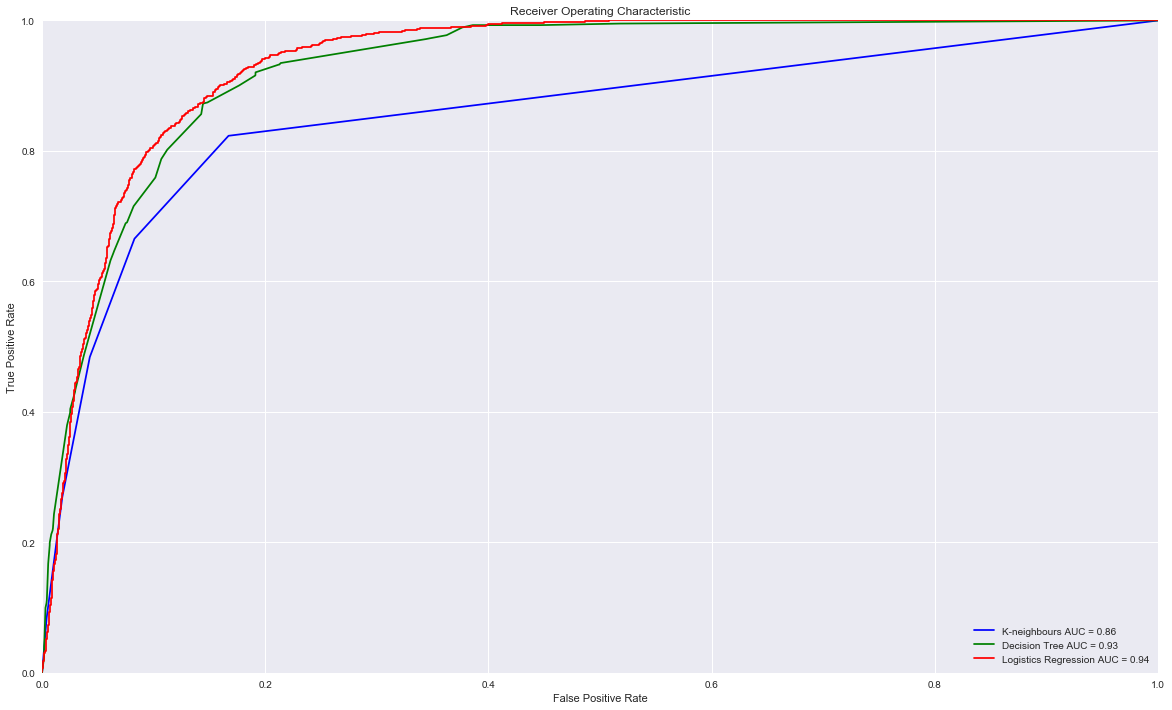

In [77]:
#построим модели roc_auc_curve для них
import matplotlib.pyplot as plt
plt.figure(figsize=[20,12])
plt.title('Receiver Operating Characteristic')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# KNN
classifier = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train, y_train, X_test, y_test)
plt.plot(fpr, tpr, 'b', label = 'K-neighbours AUC = %0.2f' % roc_auc)

# Decision trees
classifier = DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=10, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=6, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train, y_train, X_test, y_test)
plt.plot(fpr, tpr, 'g', label = 'Decision Tree AUC = %0.2f' % roc_auc)

#Logistics Regression
classifier = LogisticRegression(C=0.1, class_weight='balanced', dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l1', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)
fpr, tpr, roc_auc, threshold = model_roc_auc_curve(classifier, X_train_log, y_train_log, X_test_log, y_test_log)
plt.plot(fpr, tpr, 'r', label = 'Logistics Regression AUC = %0.2f' % roc_auc)

plt.legend(loc = 'lower right')
plt.show()

In [80]:
# предскажем, используя регрессию
y_hat_pred = classifier.predict(X_true_log)
y_hat_pred_proba = classifier.predict_proba(X_true_log)

In [81]:
for k, j in enumerate(tpr):
    print (k, j,threshold[k])

0 0.0011862396204 0.999999999427
1 0.0011862396204 0.999999998913
2 0.00355871886121 0.99999971183
3 0.00355871886121 0.999999453642
4 0.00711743772242 0.999998405819
5 0.00711743772242 0.999992916823
6 0.00830367734282 0.999990259339
7 0.00830367734282 0.999970124391
8 0.0130486358244 0.999955053551
9 0.0130486358244 0.99991979997
10 0.0166073546856 0.999868025688
11 0.0166073546856 0.999846883281
12 0.017793594306 0.999792609392
13 0.017793594306 0.999745548292
14 0.0201660735469 0.999724187704
15 0.0201660735469 0.999692075254
16 0.0213523131673 0.999691017997
17 0.0213523131673 0.999689190899
18 0.0225385527877 0.999674726138
19 0.0225385527877 0.999656259417
20 0.0296559905101 0.999508198799
21 0.0296559905101 0.999470094137
22 0.0308422301305 0.999460066254
23 0.0308422301305 0.999413133369
24 0.0320284697509 0.999387177604
25 0.0320284697509 0.999222275042
26 0.0332147093713 0.999221942004
27 0.0332147093713 0.999204069812
28 0.0355871886121 0.999166248281
29 0.0355871886121 0.9

259 0.432977461447 0.923176563728
260 0.436536180308 0.921827861035
261 0.436536180308 0.921381050672
262 0.44246737841 0.920471499233
263 0.44246737841 0.920397910916
264 0.443653618031 0.920099528632
265 0.443653618031 0.919267351038
266 0.444839857651 0.919174614557
267 0.444839857651 0.918180528015
268 0.446026097272 0.917796298351
269 0.446026097272 0.917629126462
270 0.448398576512 0.917159563308
271 0.448398576512 0.916642508447
272 0.449584816133 0.916545249946
273 0.449584816133 0.915332789862
274 0.450771055753 0.915266605305
275 0.450771055753 0.915006607481
276 0.453143534994 0.914420426129
277 0.453143534994 0.913087364429
278 0.465005931198 0.91078717163
279 0.465005931198 0.910246505077
280 0.466192170819 0.910137669582
281 0.466192170819 0.90945565295
282 0.468564650059 0.908974224741
283 0.468564650059 0.908213979986
284 0.473309608541 0.906205254573
285 0.473309608541 0.905779840497
286 0.478054567023 0.904112997593
287 0.478054567023 0.903961450492
288 0.479240806643

In [83]:
df_tmp = df_regression[df_regression['sample']==0][['_id']].reset_index(drop=True)

# зададим порог в 0.3, как значение threshold для вероятности prediction based on probability
df_tmp = df_regression[df_regression['sample']==0][['_id']].reset_index(drop=True)
proba = pd.DataFrame(y_hat_pred_proba[:,1],columns = ['target'])
proba[proba['target']>=0.3] = 1
proba[proba['target']<0.3] = 0

In [84]:
df_result = pd.concat([df_tmp,proba],axis = 1, names = ['_id','target'])

In [85]:
df_result.head(5)

,_id,target
0,66810d8e6bf2b41c880a7bc6c8a1e295,1.0
1,ccac3879652b08cb8b44c1920fd93afa,0.0
2,fcccab4d7a76f70647f015f2c84c2af8,0.0
3,ed8399278c30678dab739045fa12b440,0.0
4,1d4d62ac5cabcb48bac7112813f290cb,0.0


In [86]:
df_result.to_csv('submission.csv', sep=',', encoding='utf8',index = False)

In [87]:
proba.values.mean()

0.30389657683903859